In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

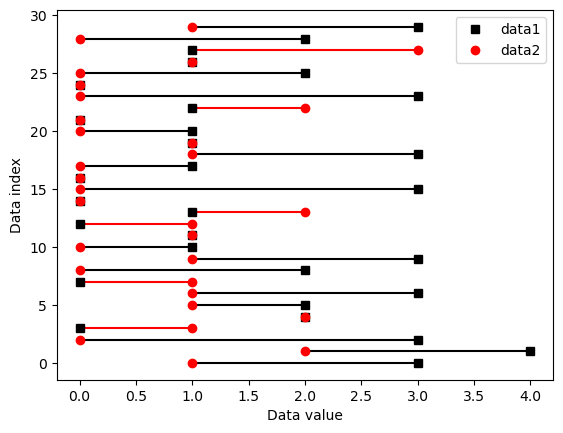

In [39]:
N = 30

data1 = np.random.poisson(1.5, N)
data2 = np.random.poisson(1, N)

colors = 'kr'

for i in range(N):
    plt.plot([data1[i], data2[i]], [i, i], colors[int(data1[i] < data2[i])])

plt.plot(data1, np.arange(N), 'ks', markerfacecolor='k', label='data1')
plt.plot(data2, np.arange(N), 'ro', markerfacecolor='r', label='data2')

plt.xlabel('Data value')
plt.ylabel('Data index')
plt.legend()

plt.show()

In [71]:
rank, p = stats.wilcoxon(data1, data2)
print(f'Wilcoxon rank = {rank} p = {p:.5f}')

Wilcoxon rank = 99.0 p = 0.00000


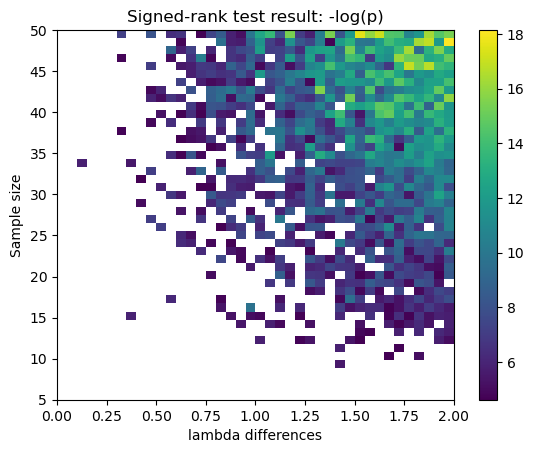

In [72]:
Ns = np.arange(5, 51)
lambdas = np.linspace(1, 3, 40)

p_vals = np.zeros((len(Ns), len(lambdas)))

for ni in range(len(Ns)):
    for li in range(len(lambdas)):
        
        data1 = np.random.poisson(lambdas[0], Ns[ni])
        data2 = np.random.poisson(lambdas[li], Ns[ni])
        
        rank, p = stats.wilcoxon(data1, data2)
        
        p_vals[ni, li] = -np.log(p)
        
p_val_thresh = 0.01
p_vals[p_vals < -np.log(p_val_thresh)] = np.NaN

plt.imshow(p_vals, origin='lower', extent=[lambdas[0] - 1, lambdas[-1] - 1, Ns[0], Ns[-1]], aspect='auto')
plt.xlabel('lambda differences')
plt.ylabel('Sample size')
plt.title('Signed-rank test result: -log(p)')
plt.colorbar()

plt.show()